In [11]:
import math
import datetime as dt
import glob
import os
import zipfile

import numpy as np
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import confusion_matrix


import keras
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, GRU, Dense, Reshape
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.constraints import max_norm

from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model



import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.signal
import scipy.io as sio
from scipy.io import loadmat

In [2]:
def metric(x, y, model):
    Y_pred = model.predict(x)
    Y_pred_classes = Y_pred.round()
    
    # Accuracy
    acc = accuracy_score(y, Y_pred_classes)
    # Precision
    prec = precision_score(y, Y_pred_classes)
    # Recall
    rec = recall_score(y, Y_pred_classes)
    # F1 score
    f1 = f1_score(y, Y_pred_classes)
    # Confusion matrix
    cm = confusion_matrix(y, Y_pred_classes)
    
    print(f"Accuracy: {acc}\nPrecision: {rec}\nF1-score: {f1}\nConfusion matrix:")
    f,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm, annot=True, linewidths=0.01,cmap="viridis",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [3]:
def K_Fold_Val(model_name, model, X, y, epochs, batch_size, K=5):
    k = K  # number of folds

    # assume X and y are your EEG data and labels, respectively
    skf = StratifiedKFold(n_splits=k)

    # initialize lists to store results
    acc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        # split data into training and testing sets
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # calculate class weights
        class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
        class_weights = dict(enumerate(class_weights))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # define checkpoint callback
        checkpoint = ModelCheckpoint(f"{model_name}_checkpoint_{fold}.h5", monitor='val_loss', save_best_only=True, verbose=1)

        # train model with checkpoint callback
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, class_weight=class_weights, validation_data=(X_test, y_test), callbacks=[checkpoint])

        # evaluate model on testing set
        y_pred = model.predict(X_test)
        y_pred = (y_pred > 0.5).astype(int)
        acc_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

    # print average scores across all folds
    print("Average accuracy:", np.mean(acc_scores))
    print("Average precision:", np.mean(precision_scores))
    print("Average recall:", np.mean(recall_scores))
    print("Average F1-score:", np.mean(f1_scores))

In [4]:
Sub1_X = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub-1/X.npy')
Sub1_Y = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub-1/Y.npy')

Sub2_X = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 2/X.npy')
Sub2_Y = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 2/Y.npy')

Sub3_X = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 3/X.npy')
Sub3_Y = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 3/Y.npy')

Sub4_X = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 4/X.npy')
Sub4_Y = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 4/Y.npy')

Sub6_X = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 6/X.npy')
Sub6_Y = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 6/Y.npy')

Sub7_X = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 7/X.npy')
Sub7_Y = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 7/Y.npy')

Sub8_X = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 8/X.npy')
Sub8_Y = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 8/Y.npy')

Sub9_X = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 9/X.npy')
Sub9_Y = np.load('/content/drive/MyDrive/Pre-processed-Dataset/Sub 9/Y.npy')

In [5]:
def CNN(input_shape=(32, 32, 1)):
  # Define the CNN model
  model = tf.keras.Sequential()

  # Add the convolutional layers
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

  # Add the pooling layers
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  # Add the flatten layer
  model.add(layers.Flatten())

  # Add the fully connected layers
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [6]:
def DRCNN(num_samples=64,num_channels=32,time_steps = 32):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(time_steps, num_channels)))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [7]:
def EEGNet(nb_classes, Chans=32, Samples=32):
    # Define the input shape
    input_shape = (Chans, Samples, 1)

    # Define the model architecture
    input_layer = layers.Input(shape=input_shape)

    block1 = layers.Conv2D(16, (1, 32), padding='same', input_shape=input_shape)(input_layer)
    block1 = layers.BatchNormalization()(block1)
    block1 = layers.DepthwiseConv2D((Chans, 1), use_bias=False, depth_multiplier=2, depthwise_constraint=max_norm(1.))(block1)
    block1 = layers.BatchNormalization()(block1)
    block1 = layers.Activation('elu')(block1)
    block1 = layers.SeparableConv2D(32, (1, 4), use_bias=False, padding='same')(block1)
    block1 = layers.BatchNormalization()(block1)
    block1 = layers.Activation('elu')(block1)
    block1 = layers.MaxPooling2D((1, 4))(block1)
    block1 = layers.Dropout(0.25)(block1)

    block2 = layers.DepthwiseConv2D((1, 4), use_bias=False, depth_multiplier=2, depthwise_constraint=max_norm(1.))(block1)
    block2 = layers.BatchNormalization()(block2)
    block2 = layers.Activation('elu')(block2)
    block2 = layers.SeparableConv2D(64, (1, 4), use_bias=False, padding='same')(block2)
    block2 = layers.BatchNormalization()(block2)
    block2 = layers.Activation('elu')(block2)
    block2 = layers.MaxPooling2D((1, 2))(block2)
    block2 = layers.Dropout(0.25)(block2)

    flatten = layers.Flatten()(block2)

    dense = layers.Dense(256, activation='elu')(flatten)
    dense = layers.Dropout(0.5)(dense)

    output_layer = layers.Dense(1, activation='sigmoid')(dense)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

In [8]:
CNN = CNN()
DRCNN = DRCNN(time_steps=32)
EEGNet = EEGNet(nb_classes=2)

In [12]:
def ensemble_model():
  input_layer = Input(shape=(32, 32))
  base_models = [CNN, DRCNN, EEGNet]
  outputs = [model(input_layer) for model in base_models]
  merge = concatenate(outputs)
  dense = Dense(units=128, activation='relu')(merge)
  dropout = Dropout(rate=0.5)(dense)
  output_layer = Dense(units=1, activation='sigmoid')(dropout)
  model = Model(inputs=input_layer, outputs=output_layer)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

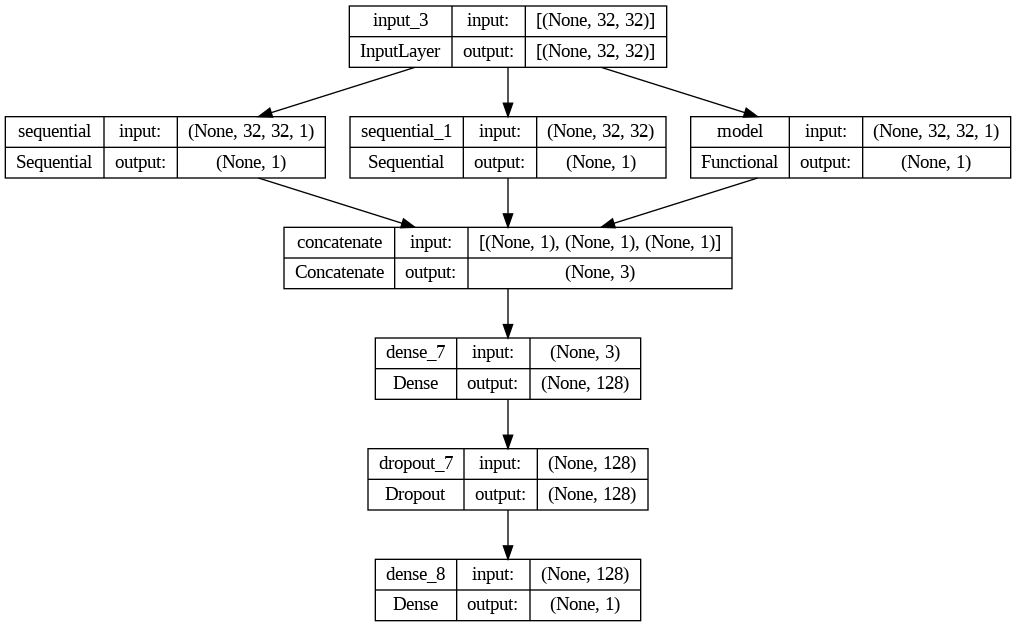

In [13]:
from tensorflow.keras.utils import plot_model
ensemble = ensemble_model()
plot_model(ensemble, to_file='ensemble.png', show_shapes=True, show_layer_names=True)

In [ ]:
ensample_model = None
ensample_model = ensemble_model()

X = np.concatenate((Sub1_X, Sub2_X, Sub3_X, Sub4_X, Sub6_X, Sub7_X, Sub9_X), axis=0)
Y = np.concatenate((Sub1_Y, Sub2_Y, Sub3_Y, Sub4_Y, Sub6_Y, Sub7_Y, Sub9_Y), axis=0)

x = X
y = Y

K_Fold_Val("Ensample", ensample_model, x, y, 15, 64, K=8)

In [ ]:
ensample_model = None
ensample_model = ensemble_model()

x = Sub8_X
y = Sub8_Y

K_Fold_Val("Ensample", ensample_model, x, y, 15, 8, K=5)